# Plotly Tools

可互動式畫圖套件 

In [1]:
import pandas as pd
import statistics
import datetime 
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sb
import codecs
import re
import os
import pickle
from datetime import datetime


path    = './Fund_Data/'
dic     = {}

# 找尋所有資料夾內的基金資料
for dirPath, dirNames, fileNames in os.walk(path):
    for f in fileNames:
        if bool(re.search(r"_all.csv$",f)):
            name = re.findall(r"\w+(?:_)",f)[0][0:-1]
            dic[name] = os.path.join(dirPath, f)
            print('基金: '+ name)

# 讀全部檔案
dfs = [pd.read_csv(dic[file], skiprows=3, names=['年月日', file + " 淨值(元)"]) for file in dic]

# 把全部基金的 dataframe 合併成一個
df_merge = dfs[0]
for df_ in dfs[1:]:
    df_merge = df_merge.merge(df_, on='年月日', how='left')
    
# 把時間資料轉為 rangeselector 可讀取的格式 Ex: 2019-05-03
x_data = []
for x in df_merge['年月日']:
    x_data.append(datetime.strptime(x, "%d/%m/%Y").strftime("%Y-%m-%d"))
    
df_merge['年月日'] = x_data

基金: 野村美利高收債A
基金: 野村美利高收債AS
基金: 野村美利高收債BC
基金: 野村美利高收債B1
基金: 野村美利高收債B2


In [2]:
df_merge.head()

,年月日,野村美利高收債A 淨值(元),野村美利高收債AS 淨值(元),野村美利高收債BC 淨值(元),野村美利高收債B1 淨值(元),野村美利高收債B2 淨值(元)
0,2015-11-09,9.9999,NaN,9.9967,9.9999,10.0007
1,2015-11-10,9.9996,NaN,9.9919,9.9996,9.9956
2,2015-11-11,10.0010,NaN,9.9972,10.0010,9.9981
3,2015-11-12,9.9938,NaN,9.9819,9.9938,9.9809
4,2015-11-13,9.9880,NaN,9.9654,9.9880,9.9734


## Installl plotly

In [ ]:
#!pip install plotly

# 基金資料畫圖

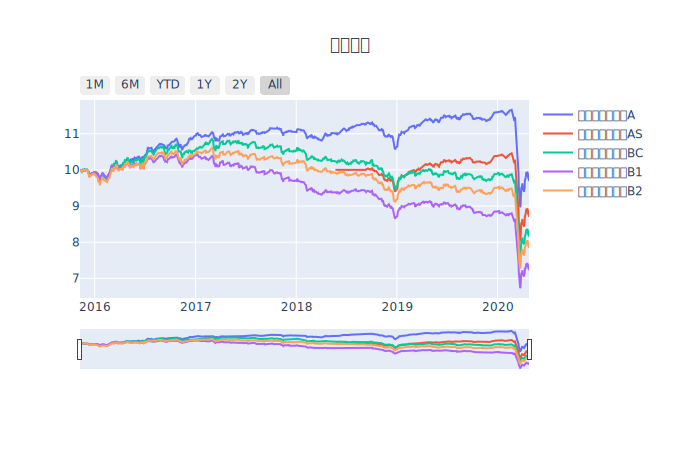

In [4]:
from plotly.graph_objs import Scatter, Layout
import plotly.graph_objs as go
import plotly 

# 靜態
#plotly.io.renderers.default = "svg" 

# 只在 Jupyter 裡面畫圖
#plotly.offline.init_notebook_mode(connected=True)

# 初始化圖
fig = go.Figure()

# 把每檔基金的圖畫出
for col in df_merge.columns[1:]:
    fig.add_trace(go.Scatter(x=df_merge['年月日'], y=df_merge[col], mode='lines', name=col[:-5]))
    
# 標題名稱與位置
fig.update_layout(title_text='基金淨值', title_x=0.5)


# 時間區段按鈕
fig.update_xaxes(
    rangeslider_visible=True,
    rangeselector=dict(
        buttons=list([
            dict(count=1, label="1M", step="month", stepmode="backward"),
            dict(count=6, label="6M", step="month", stepmode="backward"),
            dict(count=1, label="YTD", step="year", stepmode="todate"),
            dict(count=1, label="1Y", step="year", stepmode="backward"),
            dict(count=2, label="2Y", step="year", stepmode="backward"),
            dict(label="All",step="all")
        ])
    )
)
# 靜態
#fig.show("svg")

# 互動式
fig.show()
#plotly.offline.iplot(fig)

# Violin plot


In [ ]:
import seaborn as sns

# 特定年各個基金的 Violin 圖

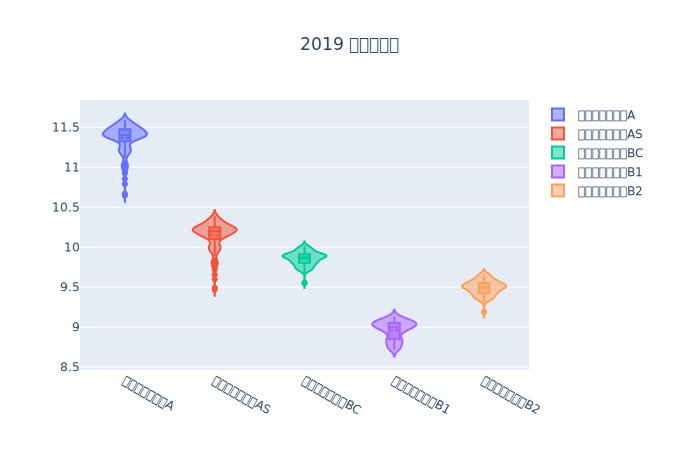

In [6]:
year = 2019

fig = go.Figure()

time_filter = [str(year)+'-01-01',str(year+1)+'-01-01']
for col in df_merge.columns[1:]:
    fig.add_trace(go.Violin(y=df_merge[(df_merge['年月日'] > time_filter[0]) & (df_merge['年月日'] < time_filter[1])][col]
                                , name=col[:-5],box_visible=True,meanline_visible=True))
    
# 標題名稱與位置
fig.update_layout(title_text=str(year) +' 年基金淨值', title_x=0.5)

# 靜態
#fig.show("svg")

fig.show()
#plotly.offline.iplot(fig)

# 特定基金每年的 Violin 圖

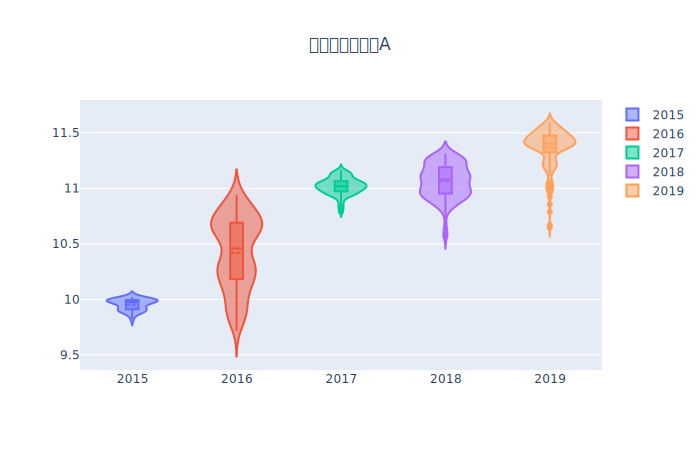

In [7]:
years = np.arange(2015,2020)

fund_name = '野村美利高收債A 淨值(元)'
df = df_merge[['年月日',fund_name]]
fig = go.Figure()

for year in years:
    time_filter = [str(year)+'-01-01',str(year+1)+'-01-01']
    fig.add_trace(go.Violin(y=df[(df['年月日'] > time_filter[0]) & (df['年月日'] < time_filter[1])][fund_name]
                                , name=str(year),box_visible=True,meanline_visible=True))
    
# 標題名稱與位置
fig.update_layout(title_text= fund_name[:-5], title_x=0.5)

# 靜態
#fig.show("svg")

# 互動式
fig.show()
#fig.show()
#plotly.offline.iplot(fig)

# 特定基金每年每月的 Violin 圖


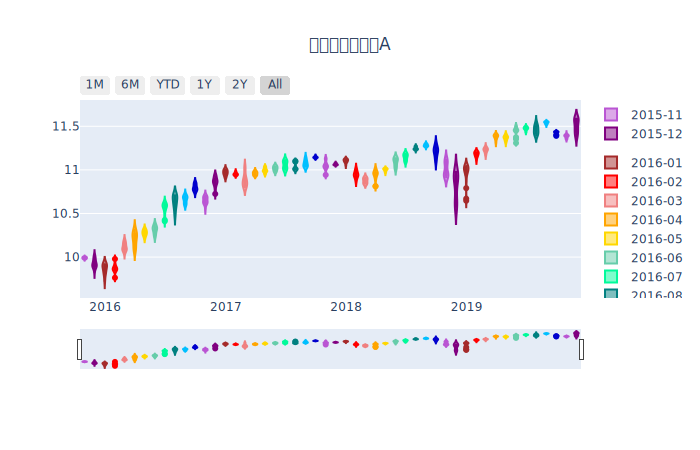

In [8]:
years = np.arange(2015,2020)
months = np.arange(1,13)
fund_name = '野村美利高收債A 淨值(元)'
df = df_merge[['年月日',fund_name]]
fig = go.Figure()
color = ['Brown','Red','LightCoral','orange','Gold','MediumAquamarine','MediumSpringGreen','Teal','DeepSkyBlue','MediumBlue','MediumOrchid','Purple']
 

for year in years:
    showlegend = True
    for month in months:
        time_filter = [str(year)+'-'+str(month).zfill(2)+'-01',str(year)+'-'+str(month).zfill(2)+'-31']
        fig.add_trace(go.Violin(y=df[(df['年月日'] > time_filter[0]) & (df['年月日'] < time_filter[1])][fund_name]
                                , name=str(year)+'-'+str(month).zfill(2)
                                , line_color= color[month-1]
                                , legendgroup=str(year)
                                , showlegend= showlegend
                                , box_visible=True,meanline_visible=True))

    
# 標題名稱與位置
fig.update_layout(title_text= fund_name[:-5], title_x=0.5)

# 時間區段按鈕
fig.update_xaxes(
    rangeslider_visible=True,
    rangeselector=dict(
        buttons=list([
            dict(count=1, label="1M", step="month", stepmode="backward"),
            dict(count=6, label="6M", step="month", stepmode="backward"),
            dict(count=1, label="YTD", step="year", stepmode="todate"),
            dict(count=1, label="1Y", step="year", stepmode="backward"),
            dict(count=2, label="2Y", step="year", stepmode="backward"),
            dict(label="All",step="all")
        ])
    )
)

# 靜態
#fig.show("svg")

# 互動式
fig.show()
#plotly.offline.iplot(fig)

# 特定基金每月的 Violin 圖

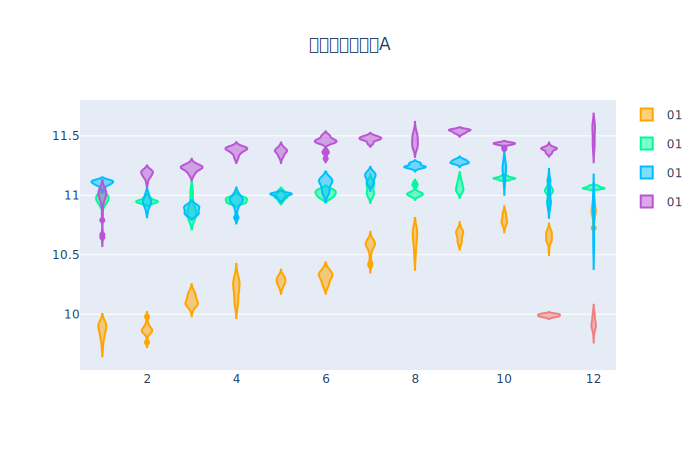

In [9]:
years = np.arange(2015,2020)
months = np.arange(1,13)
fund_name = '野村美利高收債A 淨值(元)'
df = df_merge[['年月日',fund_name]]
fig = go.Figure()
color = ['LightCoral','orange','MediumSpringGreen','DeepSkyBlue','MediumOrchid']
 
    
    
for year in years:
    showlegend = True
    for month in months:
        time_filter = [str(year)+'-'+str(month).zfill(2)+'-01',str(year)+'-'+str(month).zfill(2)+'-31']
        fig.add_trace(go.Violin(y=df[(df['年月日'] > time_filter[0]) & (df['年月日'] < time_filter[1])][fund_name]
                                , name=str(month).zfill(2)
                                , legendgroup=str(year)
                                , showlegend= showlegend
                                , hovertext=str(year)
                                , line_color= color[year-2015]))
        showlegend = False

    
# 標題名稱與位置
fig.update_layout(title_text= fund_name[:-5], title_x=0.5)


# 靜態
#fig.show("svg")

# 互動式
fig.show()
#plotly.offline.iplot(fig)